In [1]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [2]:
from bs4 import BeautifulSoup
import os
import requests
from datetime import timedelta
from datetime import datetime as dt
import ast
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [4]:
df20 = pd.read_csv("drive/My Drive/DF20.csv")
df21 = pd.read_csv("drive/My Drive/DF21.csv")

In [5]:
import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
from wordcloud import WordCloud, STOPWORDS
add_stop = ['πανδημία', 'πανδημίας']
nlp = spacy.load('el_core_news_sm')
import scipy
import seaborn as sns 
import sklearn.manifold
import json
import urllib.parse

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [7]:
df20['length'] =  df20['body'].apply(len)
df21['length'] =  df21['body'].apply(len)

In [8]:
sns.set_theme()

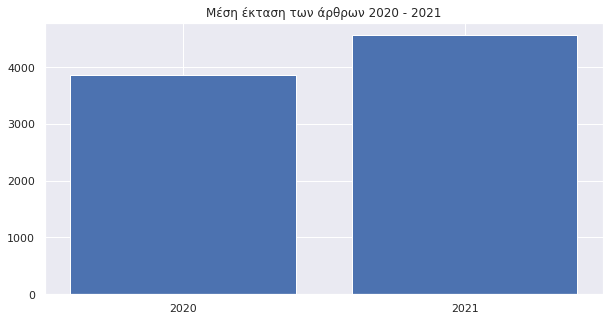

In [9]:
data = {'2020':df20['length'].mean(), '2021':df21['length'].mean()}
year = list(data.keys())
length = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, length)

plt.title("Μέση έκταση των άρθρων 2020 - 2021")
plt.show()

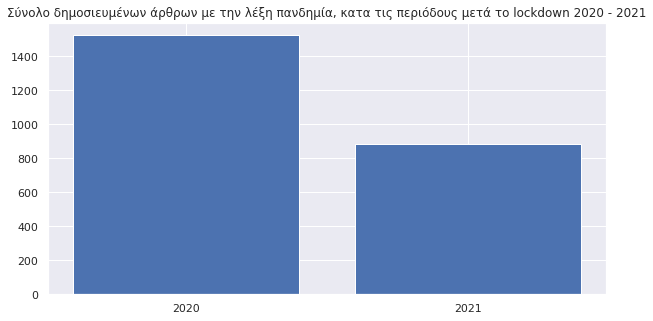

In [10]:
data = {'2020':1520, '2021':880}
year = list(data.keys())
number = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, number)

plt.title("Σύνολο δημοσιευμένων άρθρων με την λέξη πανδημία, κατα τις περιόδους μετά το lockdown 2020 - 2021")
plt.show()




In [11]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [13]:
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [14]:
df20.body = [str (item) for item in df20['body']]
df20['tokenized'] = df20['body'].map(lambda x: clean_text(x))

df21.body = [str (item) for item in df21['body']]
df21['tokenized'] = df21['body'].map(lambda x: clean_text(x))

In [15]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df20['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df21['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      σε συνέχεια της από 1252021 πρόσκλησης τακτική...
1      διαδικτυακή εκδήλωσησυζήτηση με τίτλο η εργασί...
2      ο κ μητσοτάκης δεν μπορεί να συνεχίζει να παρι...
3      την κοινή τους βούληση για περαιτέρω εμβάθυνση...
4      για το στοίχημα να παραμείνουν σε σταθερή πορε...
                             ...                        
856    σοβαρές αναταράξεις στην τουριστική αγορά προκ...
857    η καθημερινη κίνητρα για συναινετικές μειώσεις...
858    οι εκλογές της κυριακής στο πρώην ανατολικογερ...
859    πώς αλλάζουν οι καιροί έχουν περάσει δεκαετίες...
860    οι τιμές του πετρελαίου σημειώνουν άνοδο την π...
Name: tokenized, Length: 861, dtype: object

In [16]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [17]:
matrix = vec.fit_transform(df20['tokenized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
matrix = vec.fit_transform(df21['tokenized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [20]:
df20['anger'] = wordcount_df[angry_words].sum(axis=1)

df20['positivity'] = wordcount_df[positive_words].sum(axis=1)


df20['joy'] = wordcount_df[joy_words].sum(axis=1)


df20['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df20['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df20['trust'] = wordcount_df[trust_words].sum(axis=1)


df20['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df20['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df20['negative'] = wordcount_df[negative_words].sum(axis=1)

df20['fear'] = wordcount_df[fear_words].sum(axis=1)

In [21]:
df21['anger'] = wordcount_df[angry_words].sum(axis=1)

df21['positivity'] = wordcount_df[positive_words].sum(axis=1)


df21['joy'] = wordcount_df[joy_words].sum(axis=1)


df21['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df21['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df21['trust'] = wordcount_df[trust_words].sum(axis=1)


df21['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df21['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df21['negative'] = wordcount_df[negative_words].sum(axis=1)

df21['fear'] = wordcount_df[fear_words].sum(axis=1)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [23]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df20['body'])
tfidf_matrix_train_2 = tfidf_vectorizer.fit_transform(df21['body'])
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train_2))

cosine scores ==>  [[0.03074877 0.06703834 0.123699   0.03416136 0.08219641 0.10850862
  0.10284501 0.02431216 0.19211049 0.08478508 0.13077695 0.05955454
  0.13371961 0.10192472 0.09481122 0.04208867 0.07490651 0.11978579
  0.10784696 0.07987149 0.08354871 0.15069603 0.06825728 0.16809786
  0.07780446 0.05103539 0.07874257 0.12696806 0.0312463  0.02338891
  0.09433445 0.11087655 0.11268405 0.17150696 0.05779213 0.11113649
  0.10719678 0.02383427 0.06454482 0.10116648 0.26546458 0.0504088
  0.17619864 0.0978015  0.07507534 0.12923216 0.00993394 0.1398072
  0.03409322 0.21517899 0.05597806 0.04483905 0.06565712 0.00677374
  0.05701481 0.15077943 0.0867079  0.07601297 0.13182515 0.12241257
  0.03303115 0.05156961 0.08404688 0.0461677  0.05269703 0.05443143
  0.12109703 0.02829852 0.00888823 0.08007729 0.06537182 0.0588709
  0.12304178 0.11999687 0.11170482 0.12964822 0.09148475 0.02082413
  0.09777109 0.1143638  0.08658433 0.07765333 0.08274005 0.05982575
  0.04433421 0.09020704 0.074323

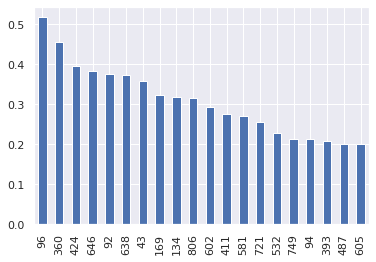

In [65]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train_2)
pd.DataFrame(arr).loc[37].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [51]:
pd.DataFrame(arr).loc[37].sort_values(ascending = False).head(10)

96     0.517463
360    0.456762
424    0.395087
646    0.382379
92     0.374960
638    0.374233
43     0.357974
169    0.323198
134    0.317218
806    0.314749
Name: 37, dtype: float64

In [69]:
df20['title'].iloc[37]

'Χωρίς ενιαία αγορά, γερμανικές και ολλανδικές βιομηχανίες θα πεθάνουν!'

In [70]:
df21['title'].iloc[96]

'Ποια ακίνητα προτιμούν να αγοράζουν τώρα οι Ελληνες'

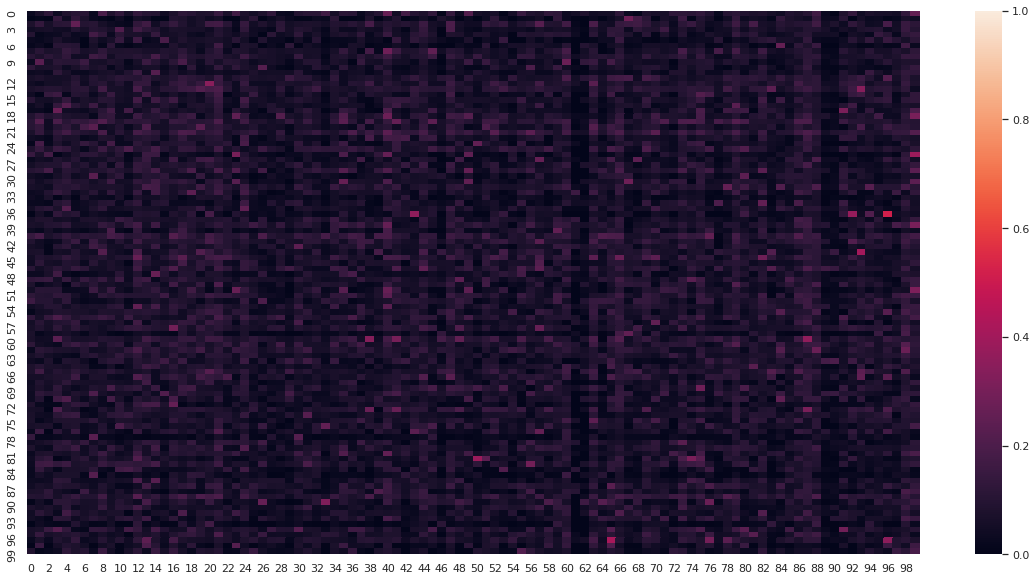

In [28]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(arr[0:100, 0:100], vmin=0, vmax=1, ax=ax)

In [29]:
df20.head()

,title,date,category,body,url,year,month,day,length,tokenized,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,Η μάχη με την ύφεση και τα σενάρια του ανασχημ...,2020-05-10 10:26:00,ΕΙΔΗΣΕΙΣ,«Έχουμε μπροστά μας έναν ‘Γολγοθά’ όσον αφορά ...,https://www.euro2day.gr/news/politics/article/...,2020,5,10,3753,έχουμε μπροστά μας έναν γολγοθά όσον αφορά τη...,3.0,17.0,0.0,5.0,0.0,13.0,6.0,3.0,5.0,7.0
1,ΗΠΑ: Εγκρίθηκε από τη Βουλή των Αντιπροσώπων τ...,2020-05-16 08:51:00,ΕΙΔΗΣΕΙΣ,Η Βουλή των Αντιπροσώπων ενέκρινε χθες Παρασκε...,https://www.euro2day.gr/news/world/article/202...,2020,5,16,870,η βουλή των αντιπροσώπων ενέκρινε χθες παρασκε...,13.0,45.0,17.0,6.0,12.0,39.0,14.0,13.0,40.0,15.0
2,Πρόβλημα ρευστότητας στο 60% των επιχειρήσεων,2020-06-03 13:26:00,ΕΙΔΗΣΕΙΣ,Πρόβλημα ρευστότητας αντιμετωπίζουν έξι στις δ...,https://www.euro2day.gr/news/economy/article/2...,2020,6,3,3504,πρόβλημα ρευστότητας αντιμετωπίζουν έξι στις δ...,14.0,15.0,2.0,7.0,1.0,11.0,2.0,9.0,21.0,16.0
3,Τσιόδρας: Κάτω του 1% τα πραγματικά κρούσματα ...,2020-05-26 18:04:00,ΕΙΔΗΣΕΙΣ,"Με τον δείκτη R0 μόλις στο 0,33 ο Σωτήρης Τσιό...",https://www.euro2day.gr/news/highlights/articl...,2020,5,26,3286,με τον δείκτη r0 μόλις στο 033 ο σωτήρης τσιόδ...,10.0,44.0,12.0,7.0,10.0,44.0,15.0,12.0,29.0,10.0
4,Άλλοι 1.081 άνθρωποι πέθαναν στις ΗΠΑ από την ...,2020-06-03 07:10:00,ΕΙΔΗΣΕΙΣ,Η πανδημία του νέου κορωνοϊού στοίχισε τη ζωή ...,https://www.euro2day.gr/news/world/article/202...,2020,6,3,1500,η πανδημία του νέου κορωνοϊού στοίχισε τη ζωή ...,2.0,7.0,1.0,4.0,2.0,3.0,0.0,3.0,8.0,2.0


In [30]:
format = '%Y-%m-%d %H:%M:%S'
df20['date'] = pd.to_datetime(df20['date'], format=format)
df20 = df20.set_index(pd.DatetimeIndex(df20['date']))

In [31]:
df21['date'] = pd.to_datetime(df21['date'], format=format)
df21 = df21.set_index(pd.DatetimeIndex(df21['date']))

Text(0.5, 1.0, 'Διακύμανση των θετικών/αρνητικών συναισθημάτων και της εμπιστοσύνης, στα άρθρα του 2020')

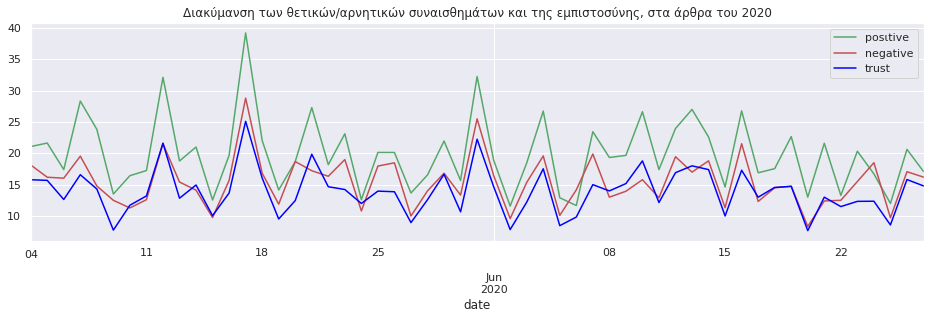

In [32]:
ax = df20['positivity'].resample('d').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='posιtive')
df20['negative'].resample('d').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'negative', color = 'r')
df20['trust'].resample('d').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()
plt.title("Διακύμανση των θετικών/αρνητικών συναισθημάτων και της εμπιστοσύνης, στα άρθρα του 2020")

Text(0.5, 1.0, 'Διακύμανση των θετικών/αρνητικών συναισθημάτων και της εμπιστοσύνης, στα άρθρα του 2021')

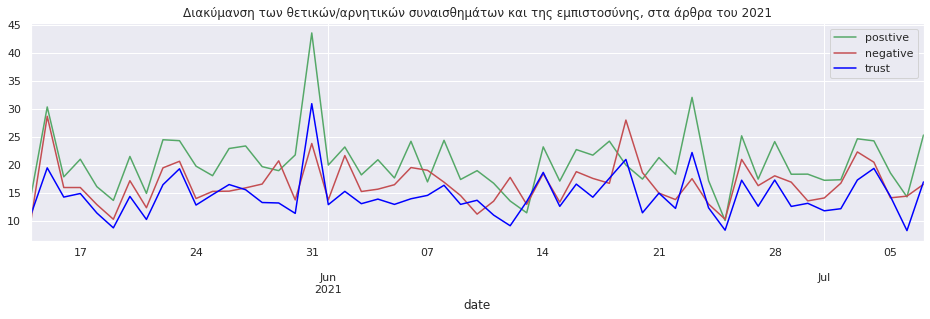

In [33]:
ax = df21['positivity'].resample('d').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='posιtive')
df21['negative'].resample('d').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'negative', color = 'r')
df21['trust'].resample('d').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()
plt.title("Διακύμανση των θετικών/αρνητικών συναισθημάτων και της εμπιστοσύνης, στα άρθρα του 2021")

In [34]:
XA = pd.read_csv("drive/My Drive/XA2.csv")

In [35]:
XA.head()

,DateTime,Price
0,06/07/2016,529.65
1,07/07/2016,531.64
2,08/07/2016,537.10
3,11/07/2016,548.09
4,12/07/2016,551.92


In [36]:
format = '%d/%m/%Y'
XA['DateTime'] = pd.to_datetime(XA['DateTime'], format=format)
XA = XA.set_index(pd.DatetimeIndex(XA['DateTime']))

Text(0.5, 1.0, 'Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 01/01/2020 - 27/06/2020')

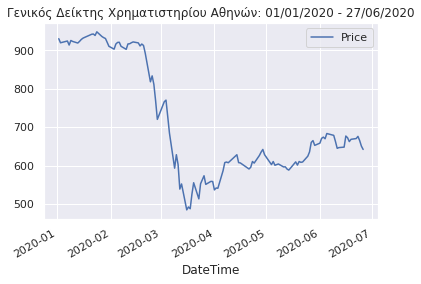

In [37]:
XA['01/01/2020':'27/06/2020'].plot(x='DateTime', y='Price')
plt.title("Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 01/01/2020 - 27/06/2020")

Text(0.5, 1.0, 'Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 01/01/2021 - 07/07/2021')

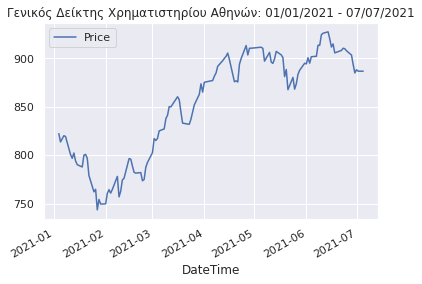

In [38]:
XA['01/01/2021':'07/07/2021'].plot(x='DateTime', y='Price')
plt.title("Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 01/01/2021 - 07/07/2021")

Text(0.5, 1.0, 'Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 04/05/2020 - 27/06/2020')

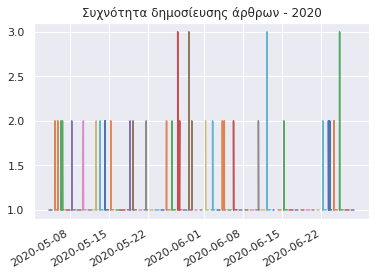

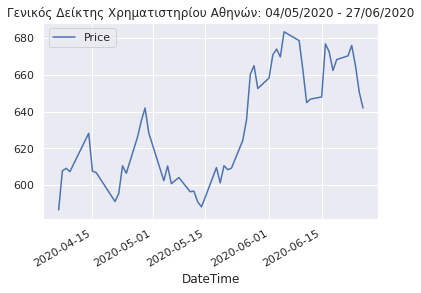

In [43]:
df20['date'].value_counts().resample('d').plot()
plt.title("Συχνότητα δημοσίευσης άρθρων - 2020")
XA['04/05/2020':'27/06/2020'].plot(x='DateTime', y='Price')
plt.title("Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 04/05/2020 - 27/06/2020")

Text(0.5, 1.0, 'Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 14/05/2021 - 07/07/2021')

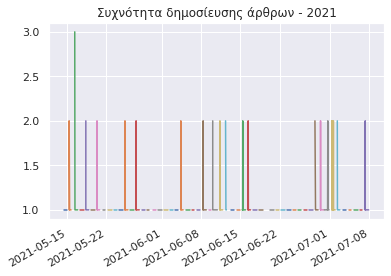

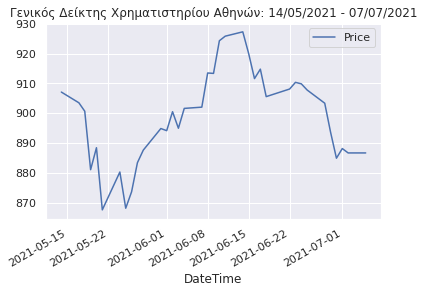

In [40]:
df21['date'].value_counts().resample('d').plot()
plt.title("Συχνότητα δημοσίευσης άρθρων - 2021")
XA['14/05/2021':'07/07/2021'].plot(x='DateTime', y='Price')
plt.title("Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 14/05/2021 - 07/07/2021")

Text(0.5, 1.0, 'Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 01/01/2020 - 07/07/2021')

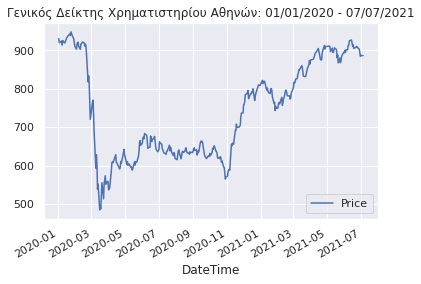

In [41]:
XA['01/01/2020':'07/07/2021'].plot(x='DateTime', y='Price')
plt.title("Γενικός Δείκτης Χρηματιστηρίου Αθηνών: 01/01/2020 - 07/07/2021")

In [42]:
XA['Price'].head()

DateTime
2016-07-06    529.65
2016-07-07    531.64
2016-07-08    537.10
2016-07-11    548.09
2016-07-12    551.92
Name: Price, dtype: float64